**Tabalho Prático 1 – Análise de Crédito**

**Alunos:

GIOVANNI SURIANI FERREIRA

JORGE ALIOMAR TROCOLI ABDON DANTAS**

**Enunciado(s):**

Cada dupla deve escolher um problema no Kaggle. Elaborar uma solução e apresentar para turma no dia da entrega. A solução da dupla deve ser entregue no Moodle em um Python Notebook. Especificamente, a dupla deve:
- Pesquisar um problema interessante no Kaggle que envolva dados tabulares/estruturados;
- Realizar uma análise exploratória dos dados da competição. Isto é, visualizar os dados, tentar identificar dados faltantes, instâncias ruidosas e tendências nos dados;
- Entender e implementar a métrica de avaliação da competição;
- Implementar uma solução simples para o problema da competição para gerar um baseline (isto é, o desempenho mínimo que o sua abordagem deve alcançar);
- Estudar soluções para problemas semelhantes ao da competição escolhida. A dupla pode pesquisar, por exemplo, em artigos acadêmicos, artigos técnicos da Internet e o no próprio Kaggle;
- Implementar diferentes abordagens para a competição e reportar o desempenho de cada abordagem implementada;
- Realizar uma avaliação de parâmetro (hyperparameter tuning) das abordagens escolhidas para o problema. Para realizar a avaliação dos parâmetros você pode utilizar GridSearchCV ou Optuna.
- Além de outras abordagens, a dupla deve:
    - Propor pelo menos uma abordagem que envolva meta-learning. Ou seja, a dupla deve propor uma forma diferente de combinar vários modelos. Por exemplo, utilize a abordagem do Random Forest, porém com vários classificadores ou invés de utilizar apenas Árvores de Decisão.
- Para cada abordagem apresentada, a dupla deve apresentar:
    - desempenho no conjunto de treino, o desempenho deve ser medido com uma validação cruzada com 10 folds (10-fold cross-validation).
    - desempenho no conjunto de teste reportado pelo Kaggle

# DESAFIO E PROBLEMA ESCOLHIDO
Home Credit Default Risk (https://www.kaggle.com/competitions/home-credit-default-risk)

O desafio consiste em melhorar os modelos preditivos, da HOME CREDIT, de crédito voltados a pessoas sem histórico bancário. Utilizando dados alternativos como registros de telecomunicações e transações, a empresa quer garantir que mais pessoas aptas recebam empréstimos justos e sustentáveis. O desafio propõe que os participantes usem técnicas de ciência de dados e machine learning para prever com mais precisão a capacidade de pagamento dos clientes.

O conjunto de dados contém informações detalhadas sobre o histórico financeiro de clientes da Home Credit e de outras instituições, com o objetivo de prever a capacidade de pagamento de novos empréstimos.

 - application_{train|test}.csv: Esta é a tabela principal, dividida em dois arquivos: Treinamento (com a variável TARGET) e Teste (sem TARGET). Contém dados estáticos de todas as solicitações de empréstimo. Cada linha representa um empréstimo.

 - bureau.csv: Todos os créditos anteriores dos clientes fornecidos por outras instituições financeiras, reportados ao Bureau de Crédito (apenas para clientes com empréstimo na amostra). Cada linha representa um crédito anterior registrado antes da data da aplicação atual.
 
 - bureau_balance.csv: Saldos mensais dos créditos anteriores no Bureau de Crédito. Cada linha representa um mês de histórico para cada crédito anterior — ou seja, número de empréstimos * número de créditos anteriores * número de meses com histórico disponível.

 - POS_CASH_balance.csv: Saldos mensais dos empréstimos anteriores no ponto de venda (POS) ou empréstimos em dinheiro que o cliente teve com a Home Credit. Uma linha por mês de histórico de cada crédito anterior relacionado ao empréstimo na amostra.

 - credit_card_balance.csv: Saldos mensais dos cartões de crédito anteriores que o cliente tem com a Home Credit. Formato similar ao POS_CASH_balance, mas para cartões de crédito.

 - previous_application.csv: Todas as solicitações anteriores de empréstimos feitas à Home Credit por clientes com empréstimos na amostra atual. Uma linha por solicitação anterior.

 - installments_payments.csv: Histórico de pagamentos de créditos anteriores concedidos pela Home Credit. Inclui: a) uma linha para cada pagamento feito, e b) uma linha para cada parcela não paga. Cada linha representa um pagamento ou uma parcela de um crédito anterior.

 - HomeCredit_columns_description.csv: Arquivo com a descrição das colunas de todos os outros arquivos do conjunto de dados.

 As tabelas podem se relacionar conforme imagem abaixo:

 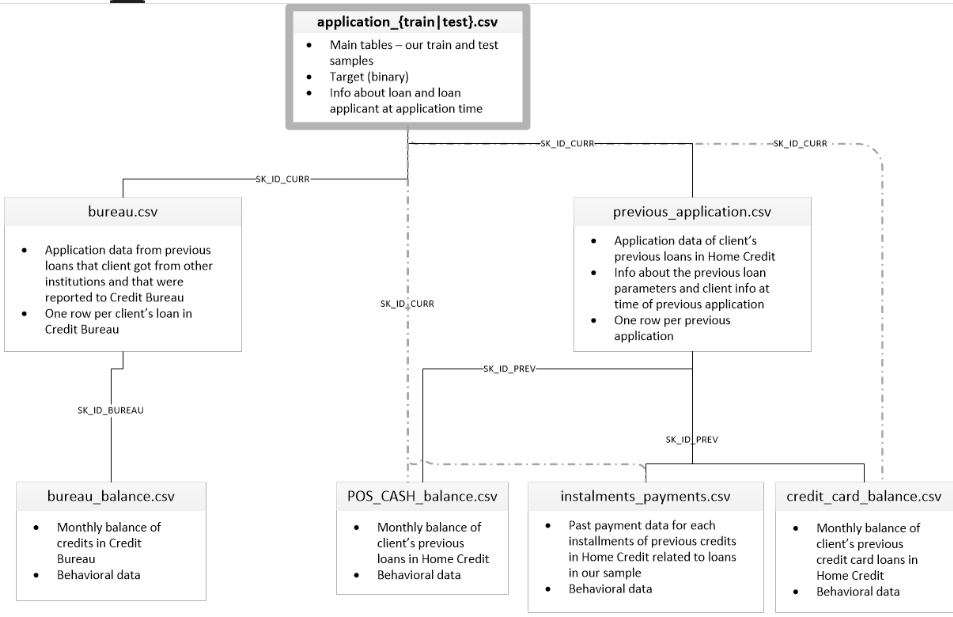




# PREPARAÇÃO DA BASE DE DADOS - Todos os dados

In [2]:
#Importando Bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np
import os, sys


#Otimizador Giovanni
#from sklearnex import patch_sklearn 
#patch_sklearn()


#CSV_PATH = "/home/gi/Desktop/Semestre8/Inteligencia_Computacional/TP1_csvs" # Path Giovanni
CSV_PATH = "E:/Documentos/CEFET/OneDrive/Documentos/2ECOM067_INTELIGENCIA-COMPUTACIONAL-I_T01/TP1/bases/" # Path Jorge

In [4]:
#Desabilitando os warnings
import warnings
warnings.simplefilter("ignore")

In [5]:
#Carregando Base de dados principal - Treino
df_train = pd.read_csv(f"{CSV_PATH}/application_train.csv")

In [6]:
# Como o volume de informações é muito grande, iremos ao invés de montar uma base única entre a base principal e as 
# demais tabelas auxiliares, iremos criar 4 bases (conforme descrito abaixo), realizar as devidas simulações e utilizar 
# as estratégias de emsemble VotingClassifier e StackingClassifier.
# Bases que serão construídas:
#   -   df_01 = application_train + bureau + bureau_balance
#   -   df_02 = application_train + previous_application + POS_CASH_balance
#   -   df_03 = application_train + previous_application + installments_payments
#   -   df_04 = application_train + previous_application + credit_card_balance

## DataFrame 01 = application_train + bureau + bureau_balance

In [7]:
#Carregamento de Bases de Dados Auxiliares
df_auxiliar_bureau                          = pd.read_csv(f"{CSV_PATH}/bureau.csv")
df_auxiliar_bureau_balance                  = pd.read_csv(f"{CSV_PATH}/bureau_balance.csv")

In [8]:
#Copia do df_train
df_01 = df_train.copy()

In [9]:
#Realização do left join de df_train com df_auxiliar_bureau
# DF da esquerda = df_train
# DF da direita  = df_auxiliar_bureau
df_01 = df_01.join(df_auxiliar_bureau, on='SK_ID_CURR', lsuffix = ' ', how='left')
df_01 = df_01.drop(columns={"SK_ID_CURR"}) #Excluir coluna duplicada

#Realização do left join de df_01 com df_auxiliar_bureau_balance
# DF da esquerda = df_01
# DF da direita  = df_auxiliar_bureau_balance
df_01 = df_01.join(df_auxiliar_bureau_balance, on='SK_ID_BUREAU', lsuffix = ' ',  how='left')
df_01 = df_01.drop(columns={"SK_ID_BUREAU"}) #Excluir coluna duplicada

## DataFrame 02 = application_train + previous_application + POS_CASH_balance

In [10]:
#Carregamento de Bases de Dados Auxiliares
df_auxiliar_previous_application            = pd.read_csv(f"{CSV_PATH}/previous_application.csv")
df_auxiliar_POS_CASH_balance                = pd.read_csv(f"{CSV_PATH}/POS_CASH_balance.csv")

In [11]:
#Copia do df_train
df_02 = df_train.copy()

In [12]:
#Realização do left join de df_train com df_auxiliar_previous_application
# DF da esquerda = df_train
# DF da direita  = df_auxiliar_previous_application
df_02 = df_02.join(df_auxiliar_previous_application, on='SK_ID_CURR', lsuffix = ' ', how='left')
df_02 = df_02.drop(columns={"SK_ID_CURR"}) #Excluir coluna duplicada

#Realização do left join de df_02 com df_auxiliar_POS_CASH_balance
# DF da esquerda = df_02
# DF da direita  = df_auxiliar_POS_CASH_balance
df_02 = df_02.join(df_auxiliar_POS_CASH_balance, on='SK_ID_PREV', lsuffix = ' ',  how='left')
df_02 = df_02.drop(columns={"SK_ID_PREV"}) #Excluir coluna duplicada

## DataFrame 03 = application_train + previous_application + installments_payments

In [13]:
#Carregamento de Bases de Dados Auxiliares
#df_auxiliar_previous_application            = pd.read_csv(f"{CSV_PATH}/previous_application.csv")
df_auxiliar_installments_payments           = pd.read_csv(f"{CSV_PATH}/installments_payments.csv")

In [14]:
#Copia do df_train
df_03 = df_train.copy()

In [15]:
#Realização do left join de df_train com df_auxiliar_previous_application
# DF da esquerda = df_train
# DF da direita  = df_auxiliar_previous_application
df_03 = df_03.join(df_auxiliar_previous_application, on='SK_ID_CURR', lsuffix = ' ', how='left')
df_03 = df_03.drop(columns={"SK_ID_CURR"}) #Excluir coluna duplicada

#Realização do left join de df_03 com df_auxiliar_installments_payments
# DF da esquerda = df_03
# DF da direita  = df_auxiliar_installments_payments
df_03 = df_03.join(df_auxiliar_installments_payments, on='SK_ID_PREV', lsuffix = ' ',  how='left')
df_03 = df_03.drop(columns={"SK_ID_PREV"}) #Excluir coluna duplicada

## DataFrame 04 = application_train + previous_application + credit_card_balance

In [16]:
#Carregamento de Bases de Dados Auxiliares
#df_auxiliar_previous_application            = pd.read_csv(f"{CSV_PATH}/previous_application.csv")
df_auxiliar_credit_card_balances            = pd.read_csv(f"{CSV_PATH}/credit_card_balance.csv")

In [17]:
#Copia do df_train
df_04 = df_train.copy()

In [18]:
#Realização do left join de df_train com df_auxiliar_previous_application
# DF da esquerda = df_train
# DF da direita  = df_auxiliar_previous_application
df_04 = df_04.join(df_auxiliar_previous_application, on='SK_ID_CURR', lsuffix = ' ', how='left')
df_04 = df_04.drop(columns={"SK_ID_CURR"}) #Excluir coluna duplicada

#Realização do left join de df_03 com df_auxiliar_credit_card_balances
# DF da esquerda = df_04
# DF da direita  = df_auxiliar_credit_card_balances
df_04 = df_04.join(df_auxiliar_credit_card_balances, on='SK_ID_PREV', lsuffix = ' ',  how='left')
df_04 = df_04.drop(columns={"SK_ID_PREV"}) #Excluir coluna duplicada

In [19]:
# Tamanhos dos Data Frames criados
print(df_01.shape, df_02.shape, df_03.shape, df_04.shape)

(307511, 140) (307511, 165) (307511, 165) (307511, 180)


# PREPARAÇÃO DA BASE DE DADOS - Amostra

Como as bases de dados original tem muitos valores, e as simulações subsequentes podem demorar muitas horas, realizar-se-a uma amostra aleatória das bases para treinamento e teste.
Para deixar as bases com os mesmos SK_ID_CURR, faz-se primeiramente a amostragem via df_01, e para os demais dataframes selecionamos os valores dos atributos (colunas) do SK_ID_CURR do df_01. Isso faz com que o y_train seja único para os 4 df_x.


In [20]:
#Amostra df_01
df_01_amostrado = df_01.sample(frac=0.025, random_state=42)  # Seleciona 20% do DataFrame


#Removendo colunas duplicadas
lista_colunas_duplicadas = [137]
df_01_amostrado.drop(df_01_amostrado.columns[lista_colunas_duplicadas], axis=1, inplace = True)

#Divisão treino
X_train_df_01_amostrado =  df_01_amostrado.drop(columns={"TARGET"})

In [21]:
# y treino
y_train =  df_01_amostrado.TARGET

In [22]:
#Amostra df_02
df_02_amostrado = df_02.loc[df_01_amostrado.index,:]


#Removendo colunas duplicadas
lista_colunas_duplicadas = [129, 158, 141, 123, 162, 130, 128, 126, 124]
df_02_amostrado.drop(df_02_amostrado.columns[lista_colunas_duplicadas], axis=1, inplace = True)

# Limpar nomes das colunas (remover caracteres especiais inválidos para JSON)
import re
df_02_amostrado.columns = [re.sub(r'[^\w]', '', col) for col in df_02_amostrado.columns]

#Divisão treino e teste
X_train_df_02_amostrado =  df_02_amostrado.drop(columns={"TARGET"})

In [23]:
#Amostra df_03
df_03_amostrado = df_03.loc[df_01_amostrado.index,:]

#Removendo colunas duplicadas
lista_colunas_duplicadas = [158, 123, 124, 126, 128, 129, 130, 141]
df_03_amostrado.drop(df_03_amostrado.columns[lista_colunas_duplicadas], axis=1, inplace = True)

# Limpar nomes das colunas (remover caracteres especiais inválidos para JSON)
import re
df_03_amostrado.columns = [re.sub(r'[^\w]', '', col) for col in df_03_amostrado.columns]

#Divisão treino e teste
X_train_df_03_amostrado =  df_03_amostrado.drop(columns={"TARGET"})

In [24]:
#Amostra df_04
df_04_amostrado = df_04.loc[df_01_amostrado.index,:]


#Removendo colunas duplicadas
lista_colunas_duplicadas = [158, 123, 124, 126, 128, 129, 130, 141, 177]
df_04_amostrado.drop(df_04_amostrado.columns[lista_colunas_duplicadas], axis=1, inplace = True)

# Limpar nomes das colunas (remover caracteres especiais inválidos para JSON)
import re
df_04_amostrado.columns = [re.sub(r'[^\w]', '', col) for col in df_04_amostrado.columns]


#Divisão treino e teste
X_train_df_04_amostrado =  df_04_amostrado.drop(columns={"TARGET"})

In [25]:
#Excluindo dataframes da memória
del df_01, df_02, df_03, df_04

# 1. Treinamento Individual dos Classificadores

In [ ]:
#Importanto as Bibliotecas dos classificadores
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.linear_model import LogisticRegression

In [27]:
#Lista dos Modelos por Classificador
modelos =   [('XGBOOST  - Config.01 - random_state=42, learning_rate = 0.3, max_depth = 6', XGBClassifier(random_state=42, learning_rate = 0.3, max_depth = 6)), 
             #('XGBOOST  - Config.02 - random_state=42, learning_rate = 0.3, max_depth = 8', XGBClassifier(random_state=42, learning_rate = 0.3, max_depth = 8)), 
             #('XGBOOST  - Config.03 - random_state=42, learning_rate = 0.2, max_depth = 6', XGBClassifier(random_state=42, learning_rate = 0.2, max_depth = 6)), 
             #('XGBOOST  - Config.04 - random_state=42, learning_rate = 0.2, max_depth = 8', XGBClassifier(random_state=42, learning_rate = 0.2, max_depth = 8)), 
             #('LIGHTGBM - Config.01 - random_state=42, learning_rate = 0.3, max_depth = 6', LGBMClassifier(random_state=42, learning_rate = 0.3, max_depth = 6, force_col_wise=True)), 
             #('LIGHTGBM - Config.02 - random_state=42, learning_rate = 0.3, max_depth = 8', LGBMClassifier(random_state=42, learning_rate = 0.3, max_depth = 8, force_col_wise=True)), 
             #('LIGHTGBM - Config.03 - random_state=42, learning_rate = 0.2, max_depth = 6', LGBMClassifier(random_state=42, learning_rate = 0.2, max_depth = 6, force_col_wise=True)), 
             #('LIGHTGBM - Config.04 - random_state=42, learning_rate = 0.2, max_depth = 8', LGBMClassifier(random_state=42, learning_rate = 0.2, max_depth = 8, force_col_wise=True)), 
             #('CATBOOST - Config.01 - random_state=42, learning_rate = 0.3, max_depth = 6', CatBoostClassifier(random_state=42, learning_rate = 0.3, max_depth = 6)), 
             #('CATBOOST - Config.02 - random_state=42, learning_rate = 0.3, max_depth = 8', CatBoostClassifier(random_state=42, learning_rate = 0.3, max_depth = 8)), 
             #('CATBOOST - Config.03 - random_state=42, learning_rate = 0.2, max_depth = 6', CatBoostClassifier(random_state=42, learning_rate = 0.2, max_depth = 6)), 
             #('CATBOOST - Config.04 - random_state=42, learning_rate = 0.2, max_depth = 8', CatBoostClassifier(random_state=42, learning_rate = 0.2, max_depth = 8)),     
            ]

In [28]:
#Transformando as variáveis catégóricas em binárias via get.dummies do df_01

#Seleção dos atributos categóricos do df_01
atributos_categoricos = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                         'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                         'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                         'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
                         'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
                         'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE', 'STATUS'
]

# Transformar usando pd.get_dummies
X_train_df_01_amostrado_dummificado = pd.get_dummies(X_train_df_01_amostrado, columns=atributos_categoricos, drop_first=True)


# Limpar nomes das colunas (remover caracteres especiais inválidos para JSON)
import re
X_train_df_01_amostrado_dummificado.columns = [re.sub(r'[^\w]', '', col) for col in X_train_df_01_amostrado_dummificado.columns]

In [29]:
#Treino df_01
from sklearn.model_selection import cross_validate

Resultados_df_01=[]
for nome, classifier in modelos:
  scores = cross_validate(classifier, X_train_df_01_amostrado_dummificado, y_train, scoring=['roc_auc'], cv = 10)
  scores_roc_auc  = scores["test_roc_auc"].mean()
  Resultados_df_01.append({'Modelo': nome,
                    'roc_auc': scores_roc_auc})

In [30]:
#Impressão dos Resultados df_01
print(f'Modelo \t\t\t\t\t\t\t\t\t\t\t ROC_UAC')
for r in Resultados_df_01:
    print(f'{r["Modelo"]:<90}{r["roc_auc"]:.4f}')

Modelo 											 ROC_UAC
XGBOOST  - Config.01 - random_state=42, learning_rate = 0.3, max_depth = 6                0.6814


In [31]:
#Transformando as variáveis catégóricas em binárias via get.dummies do df_02

#Seleção dos atributos categóricos do df_02
atributos_categoricos = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                         'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                         'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
                         'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
                         'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
                         'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
                         'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
                         'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'
                        ]

# Transformar usando pd.get_dummies
X_train_df_02_amostrado_dummificado = pd.get_dummies(X_train_df_02_amostrado, columns=atributos_categoricos, drop_first=True)


# Limpar nomes das colunas (remover caracteres especiais inválidos para JSON)
import re
X_train_df_02_amostrado_dummificado.columns = [re.sub(r'[^\w]', '', col) for col in X_train_df_02_amostrado_dummificado.columns]

In [32]:
#Treino df_02
from sklearn.model_selection import cross_validate

Resultados_df_02=[]
for nome, classifier in modelos:
  scores = cross_validate(classifier, X_train_df_02_amostrado_dummificado, y_train, scoring=['roc_auc'], cv = 10)
  scores_roc_auc  = scores["test_roc_auc"].mean()
  Resultados_df_02.append({'Modelo': nome,
                    'roc_auc': scores_roc_auc})

In [33]:
#Impressão dos Resultados df_02
print(f'Modelo \t\t\t\t\t\t\t\t\t\t\t ROC_UAC')
for r in Resultados_df_02:
    print(f'{r["Modelo"]:<90}{r["roc_auc"]:.4f}')

Modelo 											 ROC_UAC
XGBOOST  - Config.01 - random_state=42, learning_rate = 0.3, max_depth = 6                0.6831


In [34]:
#Transformando as variáveis categóricas em binárias via get.dummies do df_03

#Seleção dos atributos categóricos do df_03
atributos_categoricos = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE",
                        "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE",
                        "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", 
                        "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "FLAG_LAST_APPL_PER_CONTRACT", 
                        "NAME_CASH_LOAN_PURPOSE", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", 
                        "NAME_CLIENT_TYPE", "NAME_GOODS_CATEGORY", "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", "CHANNEL_TYPE",
                        "NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP", "PRODUCT_COMBINATION"]

# Transformar usando pd.get_dummies
X_train_df_03_amostrado_dummificado = pd.get_dummies(X_train_df_03_amostrado, columns=atributos_categoricos, drop_first=True)


# Limpar nomes das colunas (remover caracteres especiais inválidos para JSON)
import re
X_train_df_03_amostrado_dummificado.columns = [re.sub(r'[^\w]', '', col) for col in X_train_df_03_amostrado_dummificado.columns]

In [35]:
#Treino df_03
from sklearn.model_selection import cross_validate

Resultados_df_03=[]
for nome, classifier in modelos:
  scores = cross_validate(classifier, X_train_df_03_amostrado_dummificado, y_train, scoring=['roc_auc'], cv = 10)
  scores_roc_auc  = scores["test_roc_auc"].mean()
  Resultados_df_03.append({'Modelo': nome,
                    'roc_auc': scores_roc_auc})

In [36]:
#Impressão dos Resultados df_03
print(f'Modelo \t\t\t\t\t\t\t\t\t\t\t ROC_UAC')
for r in Resultados_df_03:
    print(f'{r["Modelo"]:<90}{r["roc_auc"]:.4f}')

Modelo 											 ROC_UAC
XGBOOST  - Config.01 - random_state=42, learning_rate = 0.3, max_depth = 6                0.6885


In [37]:
#Transformando as variáveis categóricas em binárias via get.dummies do df_04

#Seleção dos atributos categóricos do df_04
atributos_categoricos = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
                         "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
                         "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE",
                         "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE",
                         "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE",
                         "FLAG_LAST_APPL_PER_CONTRACT", "NAME_CASH_LOAN_PURPOSE",
                         "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON",
                         "NAME_CLIENT_TYPE", "NAME_GOODS_CATEGORY", "NAME_PORTFOLIO",
                         "NAME_PRODUCT_TYPE", "CHANNEL_TYPE", "NAME_SELLER_INDUSTRY",
                         "NAME_YIELD_GROUP", "PRODUCT_COMBINATION"
                        ]

# Transformar usando pd.get_dummies
X_train_df_04_amostrado_dummificado = pd.get_dummies(X_train_df_04_amostrado, columns=atributos_categoricos, drop_first=True)


# Limpar nomes das colunas (remover caracteres especiais inválidos para JSON)
import re
X_train_df_04_amostrado_dummificado.columns = [re.sub(r'[^\w]', '', col) for col in X_train_df_04_amostrado_dummificado.columns]

In [38]:
#Treino df_04
from sklearn.model_selection import cross_validate

Resultados_df_04=[]
for nome, classifier in modelos:
  scores = cross_validate(classifier, X_train_df_04_amostrado_dummificado, y_train, scoring=['roc_auc'], cv = 10)
  scores_roc_auc  = scores["test_roc_auc"].mean()
  Resultados_df_04.append({'Modelo': nome,
                    'roc_auc': scores_roc_auc})

In [39]:
#Impressão dos Resultados df_04
print(f'Modelo \t\t\t\t\t\t\t\t\t\t\t ROC_UAC')
for r in Resultados_df_04:
    print(f'{r["Modelo"]:<90}{r["roc_auc"]:.4f}')

Modelo 											 ROC_UAC
XGBOOST  - Config.01 - random_state=42, learning_rate = 0.3, max_depth = 6                0.6828


# 2. Combinação dos modelos

Pegou-se os modelos com melhores resultados dos dataframes df_01, df_02, df_03 e df_04 e aplicou a estratégia de combinação deles

In [ ]:
#Importando Bibliotecas pertinentes
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [38]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [39]:
# def avaliar_modelo(modelo, X, y, nome="Modelo"):
#     roc_auc = []
#     for train_idx, test_idx in skf.split(X, y):
#         X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#         y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
#         modelo.fit(X_train, y_train)
#         preds = modelo.predict(X_test)
#         roc_auc.append(roc_auc_score(y_test, preds))
#     print(f"{nome}: roc_auc = {np.mean(roc_auc):.4f}, desvio padrão = {np.std(roc_auc):.4f}")

In [ ]:
#Função para avaliar modelo combinado
def avaliar_modelo(modelo, X1, X2, X3, X4, y, nome="Modelo"): # Modelo único
    roc_auc = [] #Criação da lista roc_auc
    for train_idx, test_idx in skf.split(X1, y): # O método .split(X1, y) divide os dados em índices de treino e teste para cada fold (partição) da validação cruzada.
                                                 # train_idx e test_idx são arrays de índices que indicam quais amostras vão para o conjunto de treino e teste, respectivamente.
        #Dividindo quatro DataFrames de entrada (X1, X2, X3, X4) em conjuntos de treino e teste, usando os mesmos índices.
        X1_train, X1_test = X1.iloc[train_idx], X1.iloc[test_idx]
        X2_train, X2_test = X2.iloc[train_idx], X2.iloc[test_idx]
        X3_train, X3_test = X3.iloc[train_idx], X3.iloc[test_idx]
        X4_train, X4_test = X4.iloc[train_idx], X4.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        #Realizando o treinamento com base no X1_train
        modelo.fit(X1_train, y_train)
        #Realizando a predição com base no X1_teste
        preds_1 = modelo.predict(X1_test)

        #Realizando o treinamento com base no X2_train
        modelo.fit(X2_train, y_train)
        #Realizando a predição com base no X2_teste
        preds_2 = modelo.predict(X2_test)

        #Realizando o treinamento com base no X3_train
        modelo.fit(X3_train, y_train)
        #Realizando a predição com base no X3_teste
        preds_3 = modelo.predict(X3_test)

        #Realizando o treinamento com base no X4_train
        modelo.fit(X4_train, y_train)
        #Realizando a predição com base no X4_teste
        preds_4 = modelo.predict(X4_test)

        #Realizando a soma das 4 predições
        soma = preds_1 + preds_2 + preds_3 + preds_4
        print (soma)
        preds = [1 if s > 2 else 0 for s in soma]

        roc_auc.append(roc_auc_score(y_test, preds))
    print(f"{nome}: roc_auc = {np.mean(roc_auc):.4f}, desvio padrão = {np.std(roc_auc):.4f}")

In [ ]:
#Definindo o modelo que será utilizado
estimador_df = XGBClassifier(random_state=42, learning_rate = 0.3, max_depth = 6)

#Definição de quem será os X's_train e y_train
X1 = X_train_df_01_amostrado_dummificado.copy()
X2 = X_train_df_02_amostrado_dummificado.copy()
X3 = X_train_df_03_amostrado_dummificado.copy()
X4 = X_train_df_04_amostrado_dummificado.copy()
y = y_train

#Invocação da função avaliar modelo
# A função tem como parâmetros de entra o estimador_df (modelo), os X's dos respectivos dataframes, o y (TARGET) e o nome do modelo
avaliar_modelo(estimador_df, X1, X2, X3, X4, y, "ModeloCombinado")

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
VotingClassifier (Hard): roc_auc = 0.5095, desvio padrão = 0.0080


In [ ]:
X1_test = df_test[] df_04.loc[df_01_amostrado.index,:]

In [ ]:
estimador_df_01.fit(X1, y)
preds_1 = modelo.predict(X1_test)
estimador_df_01.fit(X2, y_train)
preds_2 = modelo.predict(X2_test)
estimador_df_01.fit(X3, y_train)
preds_3 = modelo.predict(X3_test)
estimador_df_01.fit(X4, y_train)
preds_4 = modelo.predict(X4_test)

soma = preds_1 + preds_2 + preds_3 + preds_4
print (soma)
preds = [1 if s > 2 else 0 for s in soma]

#Geração do Data Frame das predições com o Teste Global 
df_test_voting = df_test.copy()
df_test_voting["TARGET"] = preds

# Salvar os CSVs
df_test_voting[["SK_ID_CURR", "TARGET"]].to_csv("voting.csv", index=False)



# 3. Combinação com StackingClassifier

In [ ]:


estimador_df_01 = XGBClassifier(random_state=42, learning_rate = 0.3, max_depth = 6)
estimador_df_02 = LGBMClassifier(random_state=42, learning_rate = 0.3, max_depth = 6, force_col_wise=True)
estimador_df_03 = LGBMClassifier(random_state=42, learning_rate = 0.3, max_depth = 6, force_col_wise=True)
estimador_df_04 = CatBoostClassifier(random_state=42, learning_rate = 0.3, max_depth = 6)

stacking = StackingClassifier(estimators=[('df_01', estimador_df_01), ('df_02', estimador_df_02), 
                                           ('df_03', estimador_df_03), ('df_04', estimador_df_04)], 
                                           final_estimator=LogisticRegression(), cv=5)
avaliar_modelo(stacking, X, y, "StackingClassifier")

[LightGBM] [Info] Number of positive: 4454, number of negative: 50897
[LightGBM] [Info] Total Bins 13693
[LightGBM] [Info] Number of data points in the train set: 55351, number of used features: 239
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080468 -> initscore=-2.436001
[LightGBM] [Info] Start training from score -2.436001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

# Dataframes para o Kaggle

In [ ]:
df_test  = pd.read_csv(f"{CSV_PATH}/application_test.csv")

In [ ]:
X_test = df_test.copy()
X_train_encoded = pd.get_dummies(X) # Transformar variáveis categóricas em binárias
X_test_encoded = pd.get_dummies(X_test) # Transformar variáveis categóricas em binárias

# Alinhe as colunas entre treino e teste
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [50]:
#Predição do Modelo com os dados de Teste Global
predictions_voting      = voting_hard.predict(X_test_encoded) ## Escolher o melhor do Voting
predictions_stacking    = stacking.predict(X_test_encoded) ## Escolher o melhor do Voting

In [52]:
#Geração do Data Frame das predições com o Teste Global 
df_test_voting = df_test.copy()
df_test_voting["TARGET"] = predictions_voting

df_test_stacking = df_test.copy()
df_test_stacking["TARGET"] = predictions_stacking

# Salvar os CSVs
df_test_voting[["SK_ID_CURR", "TARGET"]].to_csv("voting.csv", index=False)
df_test_stacking[["SK_ID_CURR", "TARGET"]].to_csv("stacking.csv", index=False)


In [53]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test_voting[["SK_ID_CURR","TARGET"]]
df_test_stacking[["SK_ID_CURR","TARGET"]]

SK_ID_CURR  TARGET
0          100001       0
1          100005       0
2          100013       0
3          100028       0
4          100038       0
...           ...     ...
48739      456221       0
48740      456222       0
48741      456223       0
48742      456224       0
48743      456250       0

[48744 rows x 2 columns]

#RESULTADOS

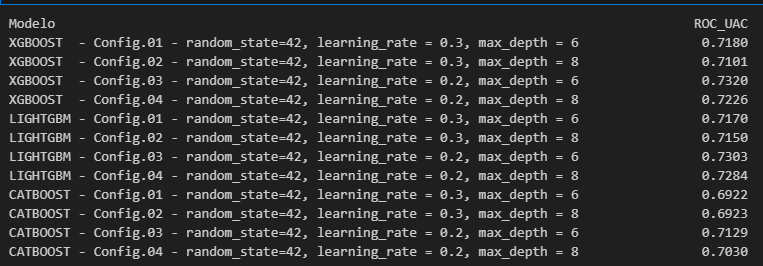

Como informado anteriormente, devido a grande quantidade de dados e limitações estruturais e de capacidade do notebook não foi possível criar uma base única com as devidas mesclagens. Como alternativa, montou-se 4 Data Frames (df_01 a df_04) com join de bases diferentes, mas tento uma base principal. Mas como a base inicial ainda continuava grande, optou-se por amostrar em 20% a base original, aleatoriamente. Cada Data Frame, gerado aleatoriamente, foi utilizado para treinar modelos dos classificadores da prática (XGBOOST, LIGHTGBM e CATBOOST), tendo como métrica de avaliação o ROC-UAC.

Para o df_01 obteve-se como resultados:

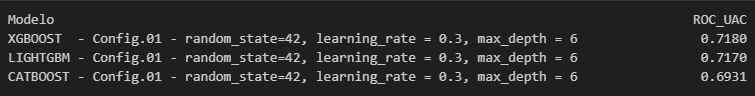


Para o df_02 obteve-se como resultados:

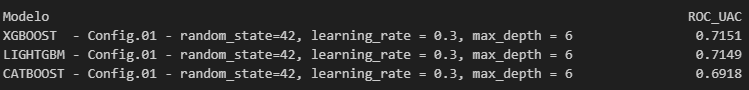


Para o df_03 obteve-se como resultados:

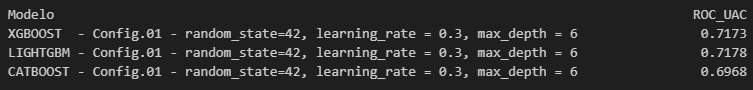


Para o df_04 obteve-se como resultados:

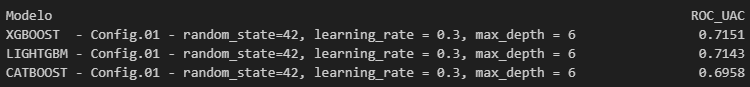


Observou-se que os modelos que sairam melhor foram o XGBOOST, LIGHTGBM, ambos com resultados próximos. Já o CATBOOST foi o de pior resultado em todos os dataframes.

No intuito de agregar os diferentes modelos para uma melhor resposta, utilizou-se a estratégia a combinação com VotingClassifier (Hard e Soft) e StackingClassifier. A combinação consiste na combinação de modelos, gerando um novo modelo, e com este novo modelo há o treinamento de uma base. Como nossa base não foi única, e sim fragmentada nos 4 data frames, optou-se por escolher o df_01 como base para X e y na combinação. A escolha foi feita por entendermos que o df_01 trazia mais informações, no entanto, ficamos com dúvida se está é uma boa e ideal escolha.

Para o VotingClassifier (Hard e Soft) obteve-se os seguintes resultados:

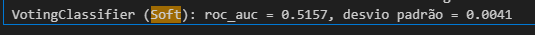



Para o StackingClassifier obteve-se os seguinte resultado



Para ambos os modelos gerados através da combinação houve a predição com o dataframe de test do Kaggle. Gerou-se 2 arquivos . CSV que foram submetidos no Kaggle, obtendo-se os seguintes resultados:

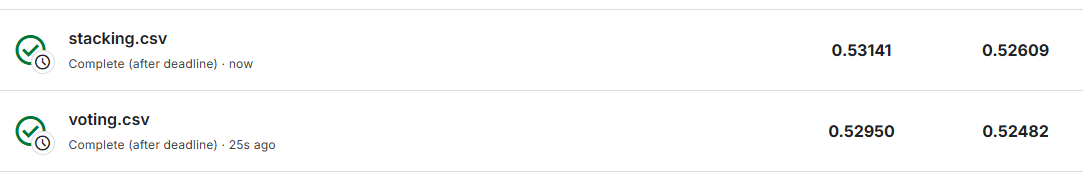

Em comparação com as simulações individuais  observou-se que houve a piora pela combinação do modelos. No entanto, os resultados da combinação foram mais próximos dos resultados após submissão no Kaggle. Isto sugere que os modelos individuais estão mais overfitados. No entanto, tem-se que ponderar que somente 20% de dados ( aproximadamente 66 mil) foram utilizados.
